In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [41]:
L = 100
W = 50
kx = 11
ky = 11

In [52]:
x, y = np.mgrid[-L:L:kx*1j, -W:W:ky*1j]

In [53]:
n = np.array([1, 0, 1])
n = n / np.linalg.norm(n)
D = 0
n, D

(array([0.70710678, 0.        , 0.70710678]), 0)

In [54]:
A, B, C = n

In [55]:
z = -(A*x+B*y+D)/C
z

array([[ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
         100.,  100.],
       [  80.,   80.,   80.,   80.,   80.,   80.,   80.,   80.,   80.,
          80.,   80.],
       [  60.,   60.,   60.,   60.,   60.,   60.,   60.,   60.,   60.,
          60.,   60.],
       [  40.,   40.,   40.,   40.,   40.,   40.,   40.,   40.,   40.,
          40.,   40.],
       [  20.,   20.,   20.,   20.,   20.,   20.,   20.,   20.,   20.,
          20.,   20.],
       [  -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,   -0.,
          -0.,   -0.],
       [ -20.,  -20.,  -20.,  -20.,  -20.,  -20.,  -20.,  -20.,  -20.,
         -20.,  -20.],
       [ -40.,  -40.,  -40.,  -40.,  -40.,  -40.,  -40.,  -40.,  -40.,
         -40.,  -40.],
       [ -60.,  -60.,  -60.,  -60.,  -60.,  -60.,  -60.,  -60.,  -60.,
         -60.,  -60.],
       [ -80.,  -80.,  -80.,  -80.,  -80.,  -80.,  -80.,  -80.,  -80.,
         -80.,  -80.],
       [-100., -100., -100., -100., -100., -100., -100., -10

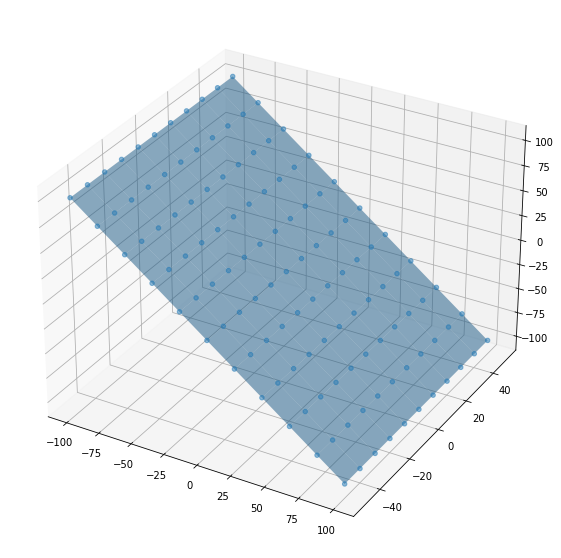

In [56]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.scatter(x, y, z, alpha=0.5)


In [57]:
ix, iy = np.mgrid[0:kx, 0:ky]

In [58]:
df = pd.DataFrame({'tr':ix.ravel(), 't':iy.ravel(), 'x':x.ravel(), 'y':y.ravel(), 'z':z.ravel()})
#df.to_csv('test_plane_1.csv', index=False)

In [72]:
def make_dotted_plane(n, D=0):
    n = n / np.linalg.norm(n)
    x, y = np.mgrid[-L:L:kx*1j, -W:W:ky*1j]
    A, B, C = n
    z = -(A*x+B*y+D)/C
    ix, iy = np.mgrid[0:kx, 0:ky]
    return pd.DataFrame({'tr':ix.ravel(), 't':iy.ravel(), 'x':x.ravel(), 'y':y.ravel(), 'z':z.ravel()}), (x, y, z)

def show_plane(*planes):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for plane in planes:
        x, y, z = plane[0], plane[1], plane[2]
        ax.scatter(x, y, z, alpha=0.5)
        #ax.plot_surface(x, y, z, alpha=0.5)

In [77]:
df1, cords1 = make_dotted_plane(np.array([1, 0, 1]))
df2, cords2 = make_dotted_plane(np.array([1, 1, 1]))

df1.to_csv('test_plane_0.csv', index=False)
df2.to_csv('test_plane_1.csv', index=False)

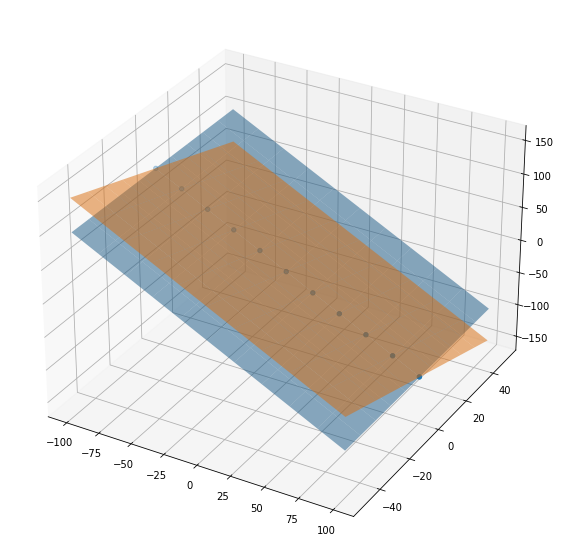

In [78]:
df = pd.read_csv('test_plane_inter.csv')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(*cords1, alpha=0.5)
ax.plot_surface(*cords2, alpha=0.5)
ax.scatter(df['x'], df['y'], df['z'])